In [1]:
# Imports
import calendar
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M
from squigglepy import bayes
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
print('Loaded...')

Loaded...


In [2]:
# Define model
starting_followers = 4474
current_followers = 4769
goal_date = datetime(2022, 11, 1, 0, 0, 0)
days_left = (goal_date - datetime.now()).days

days_in_month = calendar.monthrange(datetime.now().year, datetime.now().month)[1]
avg_gains_in_month = (current_followers - starting_followers) / (days_in_month - days_left)
monthly_projection = avg_gains_in_month * days_left
projection_weight = ((days_in_month - days_left) / days_in_month) ** 0.5
print('Days left: {}'.format(days_left))
print('Monthly projection: {}, weight: {}'.format(int(round(monthly_projection)), round(projection_weight, 3)))
print('-')


def model():
    mean = sq.mixture([sq.lognorm(70, 500),
                       sq.lognorm(monthly_projection * 0.5, monthly_projection * 2)],
                       weights=1 - projection_weight)
    
    def sample_followers(mean):
        return sq.poisson(mean) if mean > 0 else mean
    
    return current_followers + sq.dist_fn(mean, sample_followers)

print('Loaded...')

Days left: 2
Monthly projection: 20, weight: 0.967
-
Loaded...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2021.65it/s]


-
Mean: 4798.78, SD: 47.17
-
{1: 4774,
 5: 4778,
 10: 4780,
 20: 4783,
 30: 4785,
 40: 4787,
 50: 4790,
 60: 4793,
 70: 4796,
 80: 4801,
 90: 4810,
 95: 4822,
 99: 5039}


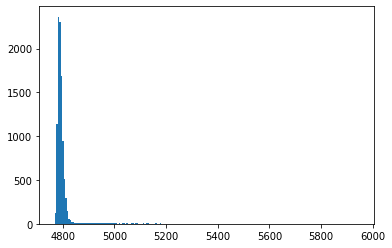

In [3]:
# Sample model
n_samples = 10*K
samples = sq.sample(model, n=n_samples, verbose=True)

print('-')
print('Mean: {}, SD: {}'.format(round(np.mean(samples), 2),
                                round(np.std(samples), 2)))
print('-')
plt.hist(samples, bins=200)
pprint(sq.get_percentiles(samples, digits=0))


Average gains per day so far: 10.2
-
## Expected average gains per day over the remainder of the month ##
{1: 2,
 5: 4,
 10: 5,
 20: 7,
 30: 8,
 40: 9,
 50: 10,
 60: 12,
 70: 13,
 80: 16,
 90: 20,
 95: 26,
 99: 135}


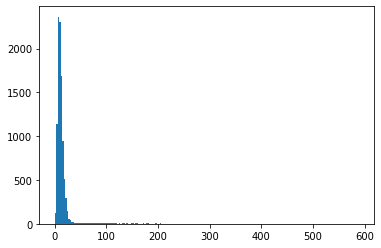

In [4]:
print('Average gains per day so far: {}'.format(round(avg_gains_in_month, 1)))
print('-')
print('## Expected average gains per day over the remainder of the month ##')
s = (samples - current_followers) / days_left
plt.hist(s, bins=200)
pprint(sq.get_percentiles(s, digits=0))

In [5]:
for target in [4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 5000]:
    print('>{} - {}%'.format(target, int(sum([s >= target for s in samples]) / len(samples) * 100)))

>4550 - 100%
>4600 - 100%
>4650 - 100%
>4700 - 100%
>4750 - 100%
>4800 - 21%
>4850 - 3%
>4900 - 2%
>5000 - 1%
